In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
import datetime as dt
import time

In [101]:
tickers = ['SPY', 'TLT']

In [102]:
start_date = "2000-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

# Download historical data from yf API
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# download data to csv
# data.to_csv("SPY-TLT-D-2000-01-01_2025-10-23.csv")

[*********************100%***********************]  2 of 2 completed


In [103]:
# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv("SPY-TLT-D-2000-01-01_2025-10-23.csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Convert all values to float
df = df.astype(float)

# keep rows from 644 since TLT started trading on 2002-07-30
df = df.iloc[644:]

# keep only Close prices from level1
df = df.xs('Close', level=1, axis=1)

# lowercase column names
df.columns = [col.lower() for col in df.columns]

# date index to datetime and normalize to remove time component
df.index = pd.to_datetime(df.index)
df.index = df.index.normalize()
df = df.sort_index()

# DatetimeIndex to lowercase column
df.index.name = 'date'

# Show the result
df.head()

,spy,tlt
date,,
2002-07-30,59.177776,37.055672
2002-07-31,59.320892,37.514805
2002-08-01,57.772152,37.728413
2002-08-02,56.477234,38.114819
2002-08-05,54.511993,38.283016


In [ ]:
# add pct change column for each ticker (simple_returns)
df['spy_pct_change'] = df['spy'].pct_change()
df['tlt_pct_change'] = df['tlt'].pct_change()

# fill na values with 0
df = df.fillna(0)

# add cumsum_simple for each ticker (cumsum_simple)
df['spy_cumsum_simple'] = df['spy_pct_change'].cumsum()
df['tlt_cumsum_simple'] = df['tlt_pct_change'].cumsum()

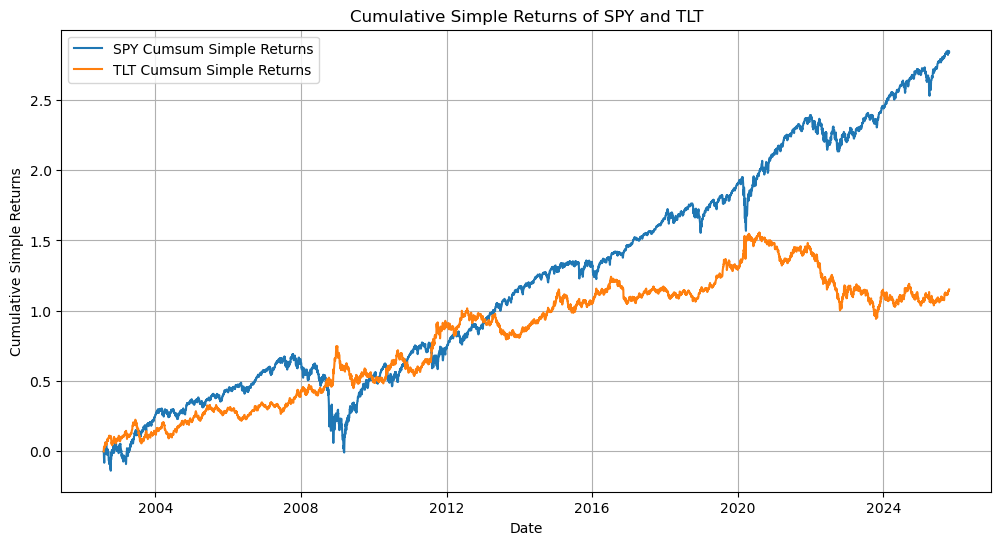

In [105]:
#  plot spy_cumsum_simple and tlt_cumsum_simple to check data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['spy_cumsum_simple'], label='SPY Cumsum Simple Returns')
plt.plot(df.index, df['tlt_cumsum_simple'], label='TLT Cumsum Simple Returns')
plt.title('Cumulative Simple Returns of SPY and TLT')
plt.xlabel('Date')
plt.ylabel('Cumulative Simple Returns')
plt.legend()
plt.grid()
plt.show()

In [106]:
# Show the result
df.head()

,spy,tlt,spy_pct_change,tlt_pct_change,spy_cumsum_simple,tlt_cumsum_simple
date,,,,,,
2002-07-30,59.177776,37.055672,0.000000,0.000000,0.000000,0.000000
2002-07-31,59.320892,37.514805,0.002418,0.012390,0.002418,0.012390
2002-08-01,57.772152,37.728413,-0.026108,0.005694,-0.023689,0.018084
2002-08-02,56.477234,38.114819,-0.022414,0.010242,-0.046104,0.028326
2002-08-05,54.511993,38.283016,-0.034797,0.004413,-0.080901,0.032739


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5847 entries, 2002-07-30 to 2025-10-22
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   spy                5847 non-null   float64
 1   tlt                5847 non-null   float64
 2   spy_pct_change     5847 non-null   float64
 3   tlt_pct_change     5847 non-null   float64
 4   spy_cumsum_simple  5847 non-null   float64
 5   tlt_cumsum_simple  5847 non-null   float64
dtypes: float64(6)
memory usage: 319.8 KB
